In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
td_transactions = pd.read_parquet('/content/drive/MyDrive/data/td_transactions.parquet')
td_transactions.head(10)

,account_number,amount,date,transaction_type,transaction_category
0,123451,147800.65,2020-11-26,D,PURCH
1,123451,38458.19,2020-11-26,D,OTHR
2,123451,73427.39,2020-11-13,D,OTHR
3,123451,18104.31,2020-11-10,D,OTHR
4,123451,93781.27,2020-11-26,D,OTHR
5,123451,16216.08,2020-11-25,D,OTHR
6,123451,95669.50,2020-11-03,D,OTHR
7,123451,10043.45,2020-11-24,D,OTHR
8,123451,101842.13,2020-11-27,D,OTHR
9,123451,35051.21,2020-11-02,D,OTHR


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

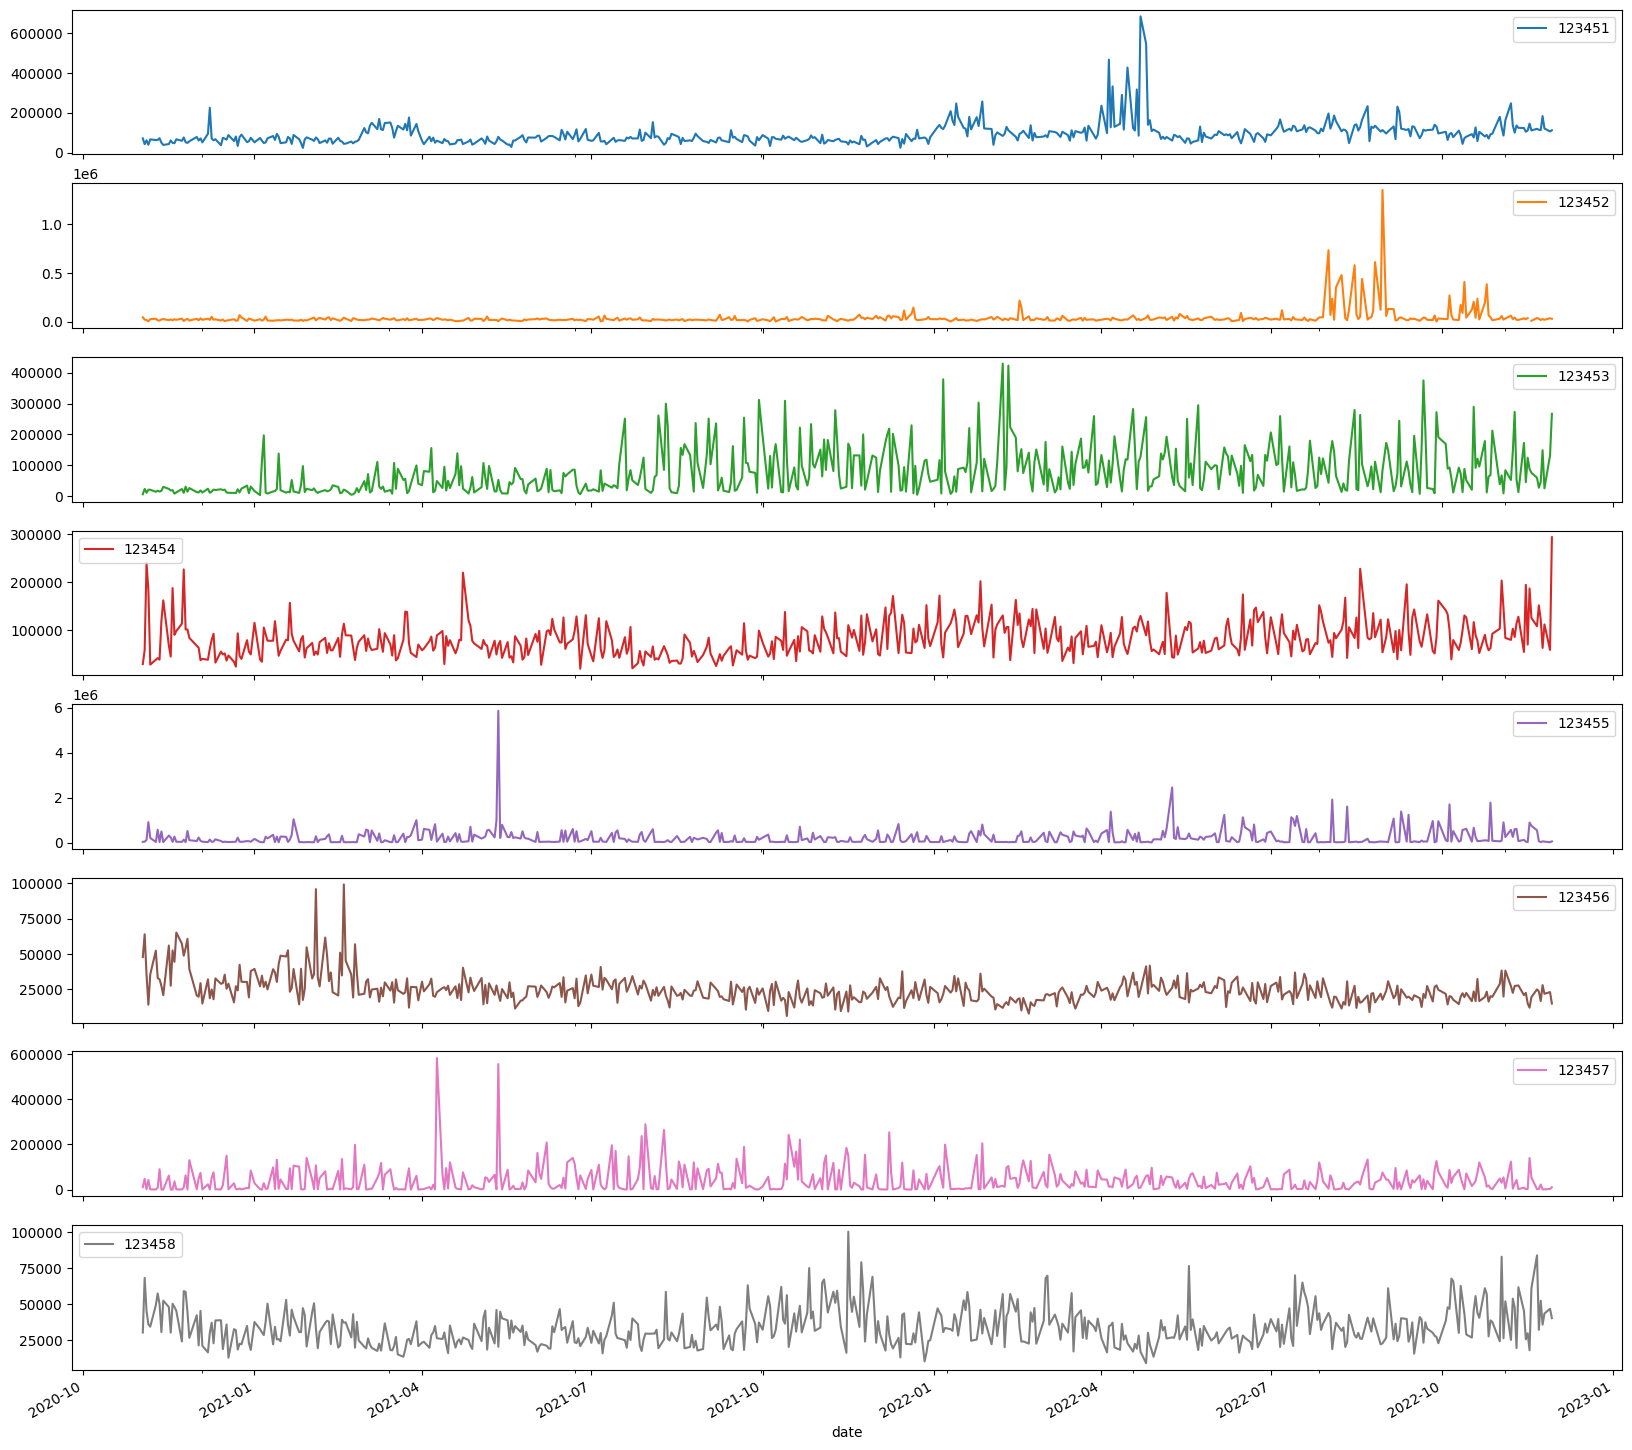

In [ ]:
import matplotlib.pyplot as plt
pd.pivot_table(td_transactions.reset_index(),
               index='date', columns='account_number', values='amount'
              ).plot(subplots=True, figsize=(20, 20))

array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

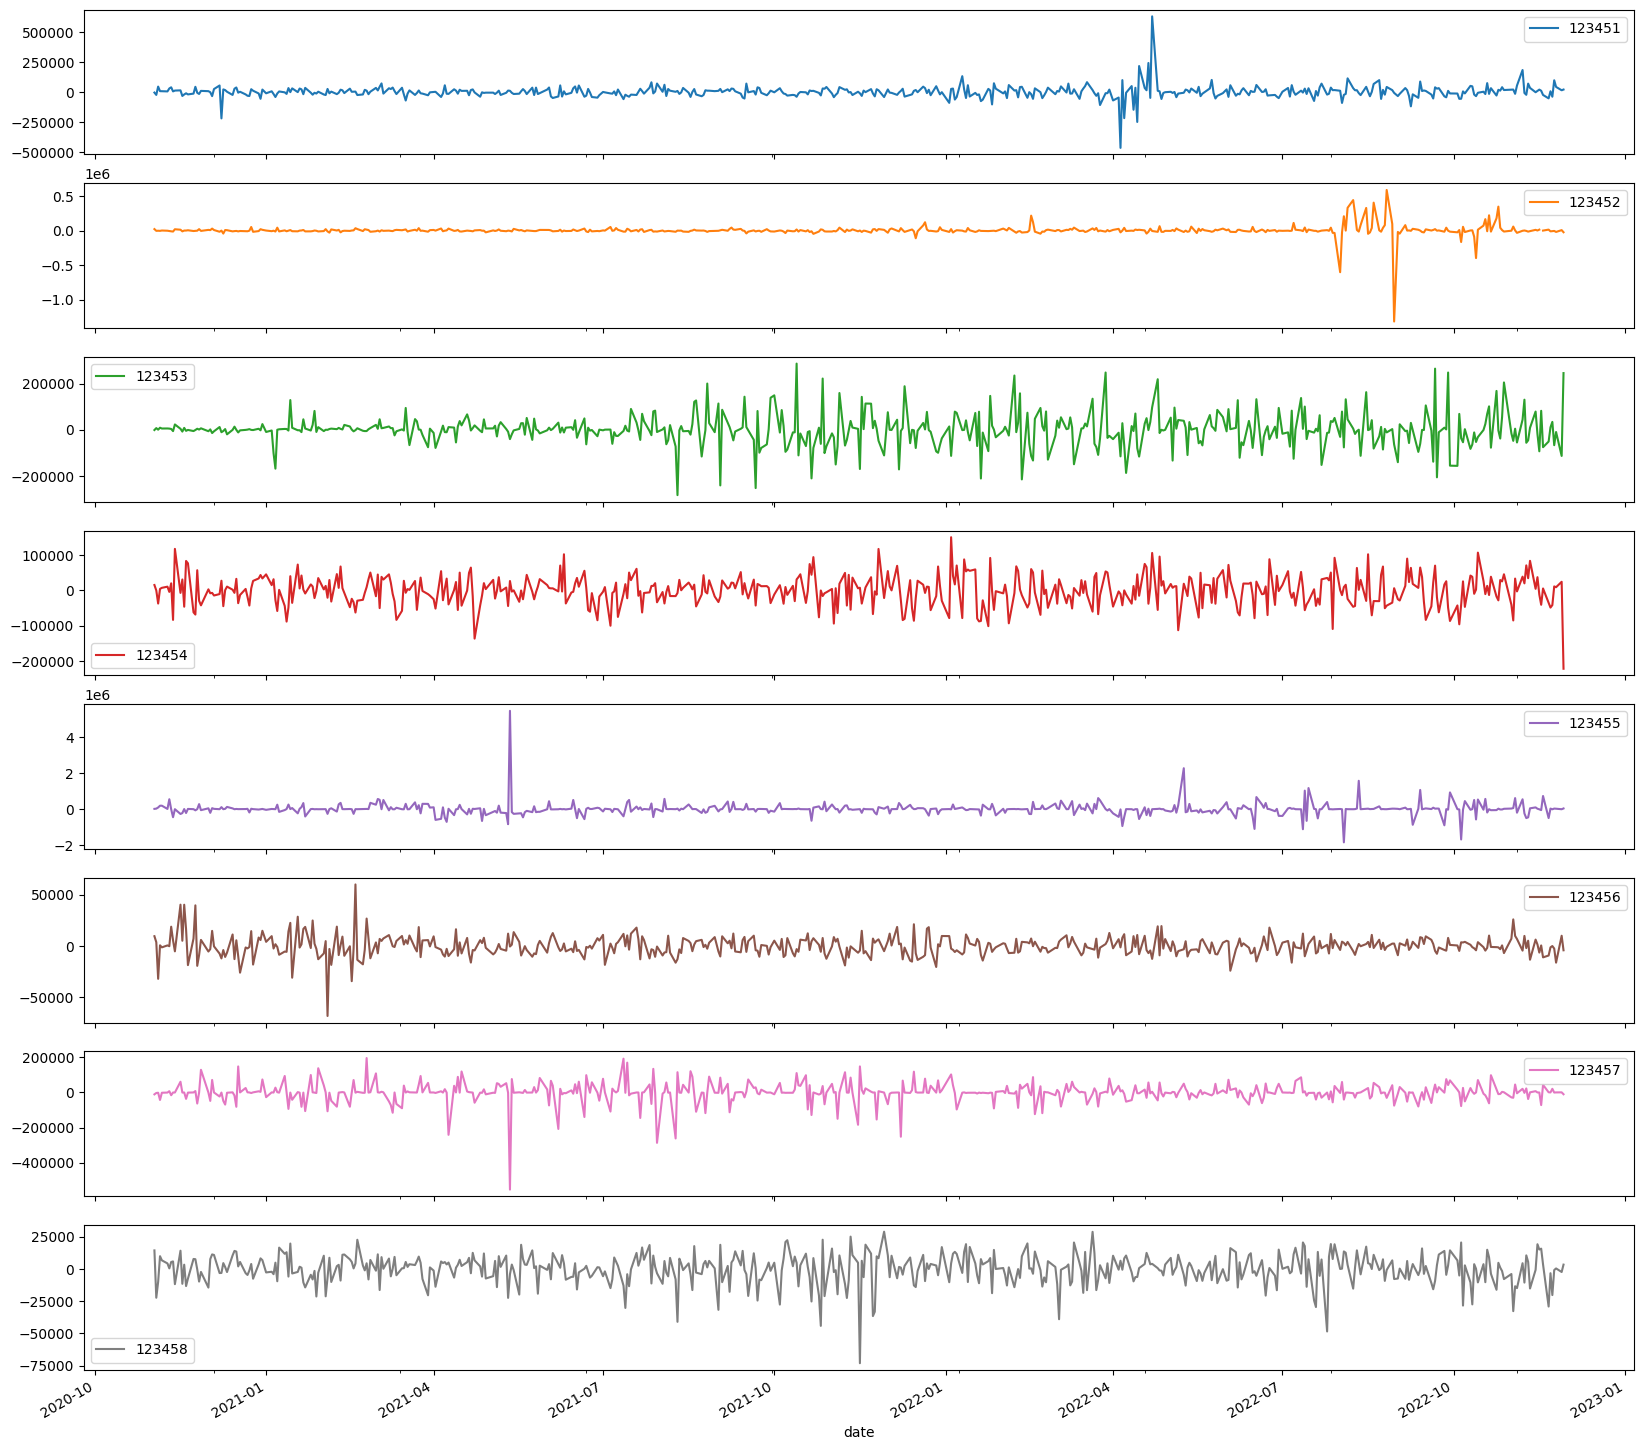

In [ ]:
td_transactions['updated_amount'] = td_transactions.amount.mask(td_transactions.transaction_type == 'D', td_transactions.amount *-1, inplace=False)

pd.pivot_table(td_transactions.reset_index(),
               index='date', columns='account_number', values='updated_amount'
              ).plot(subplots=True, figsize=(20, 20))

In [ ]:
## adding missing dates
account_numbers = td_transactions.account_number.unique()
full_range = pd.date_range(td_transactions.date.min(), td_transactions.date.max(), freq='D')

ts_data = pd.DataFrame()
for idx, account_number in enumerate(account_numbers):

    td_transactions_i = td_transactions.loc[td_transactions.account_number == account_number, ['date', 'amount', 'transaction_category', 'transaction_type', 'updated_amount']]
    #td_transactions_i.set_index('date', inplace=True)
    difference = full_range.difference(td_transactions_i.date)

    td_transactions_i['account_number'] = account_number
    temp = difference.to_frame(index=False, name='date')
    temp['account_number'] = account_number
    temp['amount'] = 0
    temp['updated_amount'] = 0
    temp['transaction_category'] = 'IDLE'
    temp['transaction_type'] = 'IDLE'
    td_transactions_i = pd.concat([td_transactions_i, temp])
    td_transactions_i.set_index('date', inplace=True)
    ts_data = pd.concat([ts_data, td_transactions_i])


In [ ]:
ts_data.sort_values(['account_number', 'date'], ascending=[True, True], inplace=True)

In [ ]:
ts_data = ts_data.groupby(['account_number', 'date'])['updated_amount'].sum().reset_index()

In [ ]:
ts_data.set_index('date', inplace=True)

In [ ]:
import pandas as pd

# Create a sample dataframe with a single column of transactions


# Create a function to set values to 0 based on whether they represent deposits or withdrawals
def set_zero_db(x):
    if x < 0:
        return -x
    else:
        return 0

# Create a new column by applying the function to the original column
ts_data['debit'] = ts_data['updated_amount'].apply(set_zero_db)

# Create a function to set values to 0 based on whether they represent deposits or withdrawals
def set_zero_cr(x):
    if x > 0:
        return x
    else:
        return 0

# Create a new column by applying the function to the original column
ts_data['credit'] = ts_data['updated_amount'].apply(set_zero_cr)

# Print the dataframe
print(ts_data)

           account_number  updated_amount      debit     credit
date                                                           
2020-11-02         123451       -48896.60   48896.60       0.00
2020-11-03         123451      -264119.61  264119.61       0.00
2020-11-04         123451       545666.15       0.00  545666.15
2020-11-05         123451        44721.26       0.00   44721.26
2020-11-06         123451       126321.62       0.00  126321.62
...                   ...             ...        ...        ...
2022-11-25         123458        26412.55       0.00   26412.55
2022-11-26         123458            0.00       0.00       0.00
2022-11-27         123458            0.00       0.00       0.00
2022-11-28         123458      -164408.46  164408.46       0.00
2022-11-29         123458       269407.95       0.00  269407.95

[6064 rows x 4 columns]


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
def ts_accounts(t=0):
  if (t==0):
    ts=[]


    for i in range(1,9):
      ts_ac= ts_data[ts_data['account_number']=='12345'+ str(i)]
      #ts_ac.reset_index(drop=True, inplace=True)
      values_db = ts_ac['debit_w'].values
      values_db1 = ts_ac['debit'].values
      scaler = MinMaxScaler(feature_range=(0, 10))
      normalized_db1 = scaler.fit_transform(values_db1.reshape(-1, 1))
      ts_ac['norm_db']=normalized_db1
      scaler = MinMaxScaler(feature_range=(0, 10))
      normalized_db = scaler.fit_transform(values_db.reshape(-1, 1))
      values_cr = ts_ac['credit_w'].values
      scaler = MinMaxScaler(feature_range=(-1, 0))
      normalized_cr = scaler.fit_transform(values_cr.reshape(-1, 1))
      values_cr1 = ts_ac['credit'].values
      scaler = MinMaxScaler(feature_range=(0, 10))
      normalized_cr1 = scaler.fit_transform(values_cr1.reshape(-1, 1))
      ts_ac['norm_cr']=normalized_cr1

      ts.append(ts_ac)
    return ts

  else:
     ts= ts_data[ts_data['account_number']=='12345'+ str(t)]
     #ts.reset_index(drop=True, inplace=True)
     values_db1 = ts['debit'].values
     scaler = MinMaxScaler(feature_range=(0, 10))
     normalized_db1 = scaler.fit_transform(values_db1.reshape(-1, 1))
     ts['norm_db']=normalized_db1
     values_cr1 = ts['credit'].values
     scaler = MinMaxScaler(feature_range=(0, 10))
     normalized_cr1 = scaler.fit_transform(values_cr1.reshape(-1, 1))
     ts['norm_cr']=normalized_cr1


     return ts

In [ ]:
def ts_week(t=0, value='updated_amount'):
  ts_ac_week=[]
  if (t==0):
    ts=ts_accounts
    for i in range(1,9):
      temp_week= ts_accounts(i).resample('W').sum()
      ts_ac_week.append(temp_week)
    return ts_ac_week
  else:
    ts_weekly=ts_accounts(t).resample('W').sum()
    return ts_weekly


In [ ]:
for i in range(1,9):
  ts_week(i)['debit'] = ts_week(i)['updated_amount'].apply(set_zero_db)
  ts_week(i)['credit'] = ts_week(i)['updated_amount'].apply(set_zero_cr)

<ipython-input-14-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-14-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1
<ipython-input-15-692ef0856f49>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_weekly=ts_acc

In [ ]:
import pandas as pd
import datetime as dt

# Read time series data into a pandas dataframe

for i in range(1,9):
# Calculate moving averages of different time windows and add them as new columns to the dataframe
  ts_data['MA_7'] = ts_data['debit'].rolling(window=7, min_periods=1).mean()
  ts_data['MA_10'] = ts_data['debit'].rolling(window=7, min_periods=1).mean()
  ts_data['MA_30'] = ts_data['debit'].rolling(window=30,min_periods=1).mean()
  ts_data['MA_90'] = ts_data['debit'].rolling(window=90,min_periods=1).mean()
  ts_data['SMA50'] = ts_data['debit'].rolling(window=50, min_periods=1).mean()
  ts_data['Lag1'] = ts_data['debit'].shift(1)
  ts_data['Lag2'] = ts_data['debit'].shift(2)
  ts_data['Lag10'] = ts_data['debit'].shift(10)
  ts_data['Lag30'] = ts_data['debit'].shift(30)
  ts_data['std_dev'] = ts_data['debit'].rolling(window=30,min_periods=2).std()
  ts_data['returns'] = ts_data['debit'].pct_change()
  ts_data['day_of_week'] = ts_data.index.dayofweek
  ts_data['month_of_year'] = ts_data.index.month
  ts_data['week_of_year'] = ts_data.index.weekofyear


#ts_data.drop('updated_amount', axis=1, inplace=True)
ts_data.fillna(0, inplace=True) # replace all NaN values with 0


<ipython-input-38-5f9a3ca0993c>:21: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  ts_data['week_of_year'] = ts_data.index.weekofyear
<ipython-input-38-5f9a3ca0993c>:21: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  ts_data['week_of_year'] = ts_data.index.weekofyear
<ipython-input-38-5f9a3ca0993c>:21: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().wee

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import pywt

# Assuming you have time series data 'data'
data=ts_accounts(6)['debit']
# Define the range of potential levels for wavelet transformation
min_level = 2
max_level = 5

# Define the number of folds for cross-validation
n_folds = 5

# Perform k-fold cross-validation
kf = KFold(n_splits=n_folds)

best_level = None
best_mse = float('inf')

for level in range(min_level, max_level+1):
    performance_mse = 0

    for train_index, val_index in kf.split(data):
        # Split the data into training and validation sets
        train_data, val_data = data[train_index], data[val_index]

        # Apply wavelet transformation at the current level
        # Adjust the wavelet family and other parameters as needed
        coeffs = pywt.wavedec(train_data, 'db4', level=level)
        reconstructed = pywt.waverec(coeffs, 'db4')
        reconstructed = reconstructed[:len(train_data)]

        # Evaluate performance using a suitable metric (e.g., MSE)
        mse = mean_squared_error(train_data, reconstructed)
        performance_mse += mse

    average_mse = performance_mse / n_folds

    # Check if the current level yields the best performance
    if average_mse < best_mse:
        best_mse = average_mse
        optimal_level_cv = level

# The optimal level for wavelet transformation
print("Optimal level:", optimal_level_cv)


Optimal level: 2


<ipython-input-32-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-32-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1


In [ ]:
import numpy as np
import pywt

# Generate sample data
data = ts_accounts(6)['debit']

# Define the range of levels to consider
min_level = 2
max_level = 10

# Perform wavelet decomposition at different levels
snr_values = []
for level in range(min_level, max_level+1):
    coeffs = pywt.wavedec(data, 'db4', level=level)
    reconstructed = pywt.waverec(coeffs, 'db4')
    residual = data - reconstructed
    snr = 10 * np.log10(np.sum(data**2) / np.sum(residual**2))
    snr_values.append(snr)

# Find the level with the maximum SNR
optimal_level_snr = min_level + np.argmax(snr_values)

print(f"Optimal Level: {optimal_level_snr}")


Optimal Level: 2


<ipython-input-10-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-10-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 7 is too high: all coefficients will experience boundary effects.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 8 is too high: all coef

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define data and threshold
data = ts_accounts(2)['debit']
def q(data):

  threshold = 3

# Calculate median absolute deviation
  mad = np.mean(np.abs(data - np.mean(data)))

# Detect outliers
  outliers = np.where(np.abs(data - np.mean(data)) / mad > threshold)[0]
  q1 = np.percentile(data, 10)
  q3 = np.percentile(data, 90)

  data_clean = np.copy(data)
  data_clean = data_clean[(data_clean >= q1) & (data_clean <= q3)]
  time_original = np.arange(len(data))
  time_cleaned = np.arange(len(data_clean))
  # Plot original data and outliers
  plt.plot(time_original, data, 'b', label='Data')
  plt.plot(outliers, data[outliers], 'ro', label='Outliers')
  plt.plot(time_cleaned, data_clean, 'g', label='Cleaned Data')
  # Add x-axis label and legend
  plt.xlabel('Time')
  plt.legend()
  plt.show()





<ipython-input-14-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-14-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1


<ipython-input-14-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-14-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1


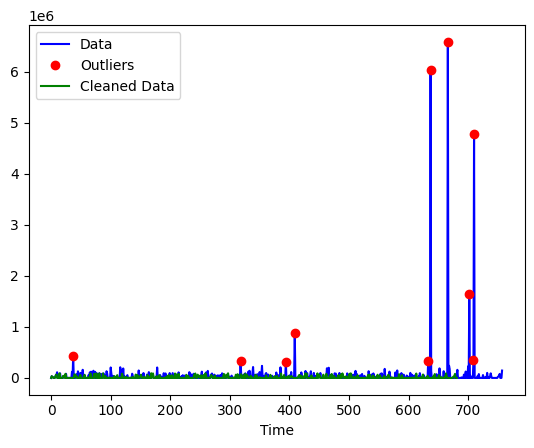

In [ ]:
q(ts_accounts(2)['debit'])

<ipython-input-14-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-14-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1


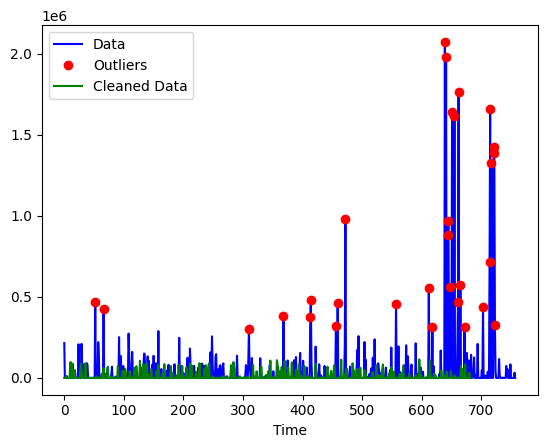

In [ ]:
q(ts_accounts(2)['credit'])

In [ ]:
def smoothing(data, window=None):
    window_size = window
    weights = np.repeat(1.0, window_size) / window_size
    smoothed = np.convolve(data, weights, 'valid')

    return smoothed


In [ ]:
from sklearn.preprocessing import MinMaxScaler
data=ts_week(2)['debit']
scaler = MinMaxScaler(feature_range=(0, 10))
normalized_data = scaler.fit_transform(np.array(data).reshape(-1, 1)).flatten()
reconstructed_data=Wavelet(data=data, level=3)

plt.figure(figsize=(10, 6))
plt.plot(normalized_data, label='Original')
plt.plot(reconstructed_data, label='Denoised')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

<ipython-input-32-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-32-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1
<ipython-input-15-692ef0856f49>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_weekly=ts_acc

NameError: ignored

In [ ]:
pip install pyts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 7.2 MB/s eta 0:00:00


In [ ]:
pip install scikit-learn

In [ ]:
pip install ssapy


In [ ]:
import numpy as np
from pyts.decomposition import SingularSpectrumAnalysis
from sklearn.metrics import adjusted_mutual_info_score
import matplotlib.pyplot as plt
data=ts_week(2)['debit']
def create_delay_embedded_matrix(data, window_size, step_size):
    n = len(data)
    k = (n - window_size) // (step_size) + 1
    X = np.zeros((k, window_size))
    for i in range(k):
        start = i * step_size
        end = start + window_size
        X[i] = data[start:end]
    return X
scaler = MinMaxScaler(feature_range=(0, 1))
data=ts_week(2)['debit']
normalized_data = scaler.fit_transform(np.array(data).reshape(-1, 1)).flatten()

window_sizes = range(5, 10)
step_sizes = range(1, 10)
best_ami = -1
best_window_size = None
best_step_size = None
embedded_matrix=[]

for window_size in window_sizes:
      for step_size in range(1, window_size):
        # Create delay-embedded matrix
          X = create_delay_embedded_matrix(normalized_data, window_size, step_size)
          embedded_matrix.append(X)
          desired_length = len(X.flatten())
          if len(normalized_data) < desired_length:
            ts_padded = np.pad(normalized_data, (0, desired_length - len(normalized_data)), 'constant')
          else:
            ts_padded = normalized_data[:desired_length]

          ami = adjusted_mutual_info_score(ts_padded, X.flatten())
          # Update best AMI and parameters
          if ami> best_ami:
               best_ami = ami
               best_window_size = window_size
               best_step_size = step_size
print(best_window_size)
print(best_step_size)
import numpy as np
from pyts.decomposition import SingularSpectrumAnalysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


best_X = create_delay_embedded_matrix(normalized_data, best_window_size, best_step_size)
ssa = SingularSpectrumAnalysis(window_size=best_window_size)
components = ssa.fit_transform(best_X)
# Assuming components is a list of selected components
input_sequence = np.concatenate(components, axis=1)

# Calculate the singular values and vectors
U, singular_values, V = np.linalg.svd(best_X)

# Set the threshold for cumulative explained variance
threshold = 0.95

# Find the number of components that exceed the threshold
cumulative_explained_variance = np.cumsum(singular_values ** 2) / np.sum(singular_values ** 2)
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1
# Assuming components is a list of selected components
input_sequence = np.concatenate(components[:3], axis=1)
#train_size = int(0.8 * len(input_sequence))  # Set the train set size
#X_train, X_test = input_sequence[:train_size], input_sequence[train_size:]
#y_train, y_test = target_data[:train_size], target_data[train_size:]
#reconstructed_data = np.dot(components[:, :num_components], V.T[:num_components, :])
#reconstructed_data = np.einsum('ijk,jl->ilk', components[:, :num_components], V.T)

#n_steps = 10  # Set the number of time steps (adjust as needed)
#n_features = input_sequence.shape[1]  # Set the number of features
#X_train = X_train.reshape((-1, n_steps, n_features))
#X_test = X_test.reshape((-1, n_steps, n_features))

# Plot the original data and reconstructed data
#plt.figure(figsize=(10, 5))
#plt.plot(data, label='Original Data')
##plt.plot(reconstructed_data.flatten(), label='Reconstructed Data')
#plt.xlabel('Time')
#plt.ylabel('Value')
#plt.legend()
#plt.show()

<ipython-input-32-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-32-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1
<ipython-input-15-692ef0856f49>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_weekly=ts_acc

7
4


In [ ]:
from pyts.decomposition import SingularSpectrumAnalysis
from sklearn.metrics import adjusted_mutual_info_score
import matplotlib.pyplot as plt
data=ts_week(2)['debit']
def create_delay_embedded_matrix(data, window_size, step_size):
    n = len(data)
    k = (n - window_size) // (step_size) + 1
    X = np.zeros((k, window_size))
    for i in range(k):
        start = i * step_size
        end = start + window_size
        X[i] = data[start:end]
    return X
scaler = MinMaxScaler(feature_range=(0, 1))
data=ts_week(2)['debit']
normalized_data = scaler.fit_transform(np.array(data).reshape(-1, 1)).flatten()

window_sizes = range(5, 10)
step_sizes = range(1, 10)
best_ami = -1
best_window_size = None
best_step_size = None
embedded_matrix=[]

for window_size in window_sizes:
      for step_size in range(1, window_size):
        # Create delay-embedded matrix
          X = create_delay_embedded_matrix(normalized_data, window_size, step_size)
          embedded_matrix.append(X)
          desired_length = len(X.flatten())
          if len(normalized_data) < desired_length:
            ts_padded = np.pad(normalized_data, (0, desired_length - len(normalized_data)), 'constant')
          else:
            ts_padded = normalized_data[:desired_length]

          ami = adjusted_mutual_info_score(ts_padded, X.flatten())
          # Update best AMI and parameters
          if ami> best_ami:
               best_ami = ami
               best_window_size = window_size
               best_step_size = step_size
print(best_window_size)
print(best_step_size)
import numpy as np
from pyts.decomposition import SingularSpectrumAnalysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


best_X = create_delay_embedded_matrix(normalized_data, best_window_size, best_step_size)
ssa = SingularSpectrumAnalysis(window_size=best_window_size)
components = ssa.fit_transform(best_X)

# Calculate the singular values and vectors
U, singular_values, V = np.linalg.svd(best_X)

# Set the threshold for cumulative explained variance
threshold = 0.95

# Find the number of components that exceed the threshold
cumulative_explained_variance = np.cumsum(singular_values ** 2) / np.sum(singular_values ** 2)
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1
# Assuming components is a list of selected components
input_series = np.concatenate(components, axis=0)
len(input_series)

<ipython-input-32-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-32-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1
<ipython-input-15-692ef0856f49>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_weekly=ts_acc

7
4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


182

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
data=ts_week(2)['debit']
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(np.array(data).reshape(-1,1))

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

73 36


<ipython-input-10-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-10-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1
<ipython-input-11-692ef0856f49>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_weekly=ts_acc

In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
pip install tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = smoothing(data=ts_accounts(2)['debit'], window=14)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(np.array(data).reshape(-1, 1))

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

# make predictions
testX = test[:-1]  # Remove the last row of the original test data
testX_pred = testX.copy()

for i in range(1, len(testX)):
    testX_pred[i] = model.predict(np.array([testX_pred[i-1]]).reshape(1,1, look_back))

trainPredict = model.predict(trainX)
testPredict = model.predict(testX_pred)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([test[:-1]])  # Use the original test data without the last row

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+look_back:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


<ipython-input-10-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-10-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1


Epoch 1/10
497/497 - 2s - loss: 6.4879e-04 - 2s/epoch - 5ms/step
Epoch 2/10
497/497 - 1s - loss: 4.5144e-04 - 1s/epoch - 2ms/step
Epoch 3/10
497/497 - 1s - loss: 3.3237e-04 - 1s/epoch - 2ms/step
Epoch 4/10
497/497 - 1s - loss: 2.3326e-04 - 1s/epoch - 2ms/step
Epoch 5/10
497/497 - 1s - loss: 1.8613e-04 - 952ms/epoch - 2ms/step
Epoch 6/10
497/497 - 1s - loss: 1.7072e-04 - 782ms/epoch - 2ms/step
Epoch 7/10
497/497 - 1s - loss: 1.5869e-04 - 768ms/epoch - 2ms/step
Epoch 8/10
497/497 - 1s - loss: 1.5959e-04 - 771ms/epoch - 2ms/step
Epoch 9/10
497/497 - 1s - loss: 1.6508e-04 - 771ms/epoch - 2ms/step
Epoch 10/10
497/497 - 1s - loss: 1.6186e-04 - 807ms/epoch - 2ms/step
16/16 [==============================] - 0s 2ms/step


TypeError: ignored

In [ ]:
pip install tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix

# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
data=smoothing(data=ts_accounts(2)['debit'], window=10)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(np.array(data).reshape(-1,1))
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX_pred = np.empty_like(testX)
testX_pred[:look_back, :] = testX[:look_back, :]



# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
for i in range(look_back, len(testX)):
    testX_pred[i] = model.predict(np.array([testX_pred[i-look_back:i]]))

trainPredict = model.predict(trainX)
testPredict = model.predict(testX_pred)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

NameError: ignored

Epoch 1/100
499/499 - 3s - loss: 0.0354 - 3s/epoch - 6ms/step
Epoch 2/100
499/499 - 1s - loss: 0.0218 - 864ms/epoch - 2ms/step
Epoch 3/100
499/499 - 1s - loss: 0.0166 - 846ms/epoch - 2ms/step
Epoch 4/100
499/499 - 1s - loss: 0.0119 - 852ms/epoch - 2ms/step
Epoch 5/100
499/499 - 1s - loss: 0.0084 - 846ms/epoch - 2ms/step
Epoch 6/100
499/499 - 1s - loss: 0.0062 - 835ms/epoch - 2ms/step
Epoch 7/100
499/499 - 1s - loss: 0.0055 - 824ms/epoch - 2ms/step
Epoch 8/100
499/499 - 1s - loss: 0.0051 - 848ms/epoch - 2ms/step
Epoch 9/100
499/499 - 1s - loss: 0.0049 - 828ms/epoch - 2ms/step
Epoch 10/100
499/499 - 1s - loss: 0.0050 - 807ms/epoch - 2ms/step
Epoch 11/100
499/499 - 1s - loss: 0.0050 - 848ms/epoch - 2ms/step
Epoch 12/100
499/499 - 1s - loss: 0.0050 - 1s/epoch - 3ms/step
Epoch 13/100
499/499 - 1s - loss: 0.0051 - 1s/epoch - 3ms/step
Epoch 14/100
499/499 - 1s - loss: 0.0051 - 1s/epoch - 2ms/step
Epoch 15/100
499/499 - 1s - loss: 0.0050 - 833ms/epoch - 2ms/step
Epoch 16/100
499/499 - 1s - los

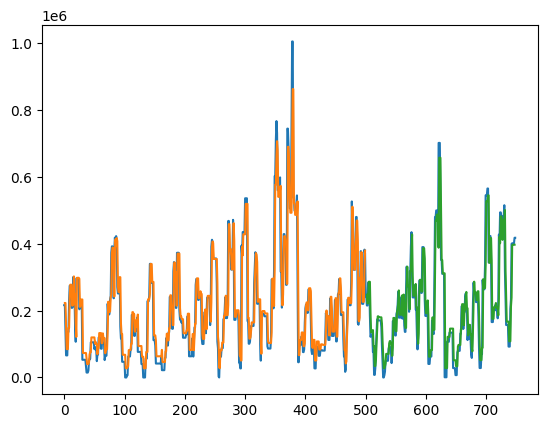

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
tf.random.set_seed(7)
# load the dataset
data=smoothing()
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(data.reshape(-1,1))
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
import numpy as np
from pyts.decomposition import SingularSpectrumAnalysis
from sklearn.metrics import adjusted_mutual_info_score
import matplotlib.pyplot as plt
data=ts_week(2)['debit']
def create_delay_embedded_matrix(data, window_size, step_size):
    n = len(data)
    k = (n - window_size) // (step_size) + 1
    X = np.zeros((k, window_size))
    for i in range(k):
        start = i * step_size
        end = start + window_size
        X[i] = data[start:end]
    return X
scaler = MinMaxScaler(feature_range=(0, 1))
data=ts_week(2)['debit']
normalized_data = scaler.fit_transform(np.array(data).reshape(-1, 1)).flatten()

window_sizes = range(5, 10)
step_sizes = range(1, 10)
best_ami = -1
best_window_size = None
best_step_size = None
embedded_matrix=[]

for window_size in window_sizes:
      for step_size in range(1, window_size):
        # Create delay-embedded matrix
          X = create_delay_embedded_matrix(normalized_data, window_size, step_size)
          embedded_matrix.append(X)
          desired_length = len(X.flatten())
          if len(normalized_data) < desired_length:
            ts_padded = np.pad(normalized_data, (0, desired_length - len(normalized_data)), 'constant')
          else:
            ts_padded = normalized_data[:desired_length]

          ami = adjusted_mutual_info_score(ts_padded, X.flatten())
          # Update best AMI and parameters
          if ami> best_ami:
               best_ami = ami
               best_window_size = window_size
               best_step_size = step_size
print(best_window_size)
print(best_step_size)
import numpy as np
from pyts.decomposition import SingularSpectrumAnalysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


best_X = create_delay_embedded_matrix(normalized_data, best_window_size, best_step_size)
import numpy as np
from pyts.decomposition import SingularSpectrumAnalysis
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Apply Singular Spectrum Analysis (SSA)
ssa = SingularSpectrumAnalysis(window_size=best_window_size)
components = ssa.fit_transform(best_X)

# Calculate the singular values and vectors
U, singular_values, V = np.linalg.svd(best_X)

# Set the threshold for cumulative explained variance
threshold = 0.95
cumulative_explained_variance = np.cumsum(singular_values ** 2) / np.sum(singular_values ** 2)
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

# Select the components that explain 95% of the variance
selected_components = components[:, :num_components]

# Normalize the selected components
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_components = scaler.fit_transform(selected_components)

# Split the data into train and test sets
train_size = int(len(normalized_components) * 0.8)
train_data = normalized_components[:train_size]
test_data = normalized_components[train_size:]

# Prepare the data for LSTM input
def prepare_lstm_input(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size_lstm = 3  # Adjust the window size for the LSTM model
x_train, y_train = prepare_lstm_input(train_data, window_size_lstm)
x_test, y_test = prepare_lstm_input(test_data, window_size_lstm)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(window_size_lstm, num_components)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(x_train, y_train, verbose=0)
test_loss = model.evaluate(x_test, y_test, verbose=0)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

# Make predictions
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)




<ipython-input-239-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-239-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1
<ipython-input-240-692ef0856f49>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_weekly=ts_

7
4


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)


ValueError: ignored

In [ ]:
import numpy as np
from pyts.decomposition import SingularSpectrumAnalysis
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense




# Apply Singular Spectrum Analysis (SSA)
ssa = SingularSpectrumAnalysis(window_size=window_size)
components = ssa.fit_transform(X)

# Calculate the singular values and vectors
U, singular_values, V = np.linalg.svd(X)

# Set the threshold for cumulative explained variance
threshold = 0.95

# Find the number of components that exceed the threshold
cumulative_explained_variance = np.cumsum(singular_values ** 2) / np.sum(singular_values ** 2)
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1

# Select the components that explain 95% of the variance
selected_components = components[:, :num_components]

# Normalize the selected components
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_components = scaler.fit_transform(selected_components)

# Split the data into train and test sets
train_size = int(len(normalized_components) * 0.8)
train_data = normalized_components[:train_size]
test_data = normalized_components[train_size:]

# Prepare the data for LSTM input
def prepare_lstm_input(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size_lstm = 3  # Adjust the window size for the LSTM model
x_train, y_train = prepare_lstm_input(train_data, window_size_lstm)
x_test, y_test = prepare_lstm_input(test_data, window_size_lstm)

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(window_size_lstm, num_components)))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
train_loss = model.evaluate(x_train, y_train, verbose=0)
test_loss = model.evaluate(x_test, y_test, verbose=0)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

# Make predictions
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)


ValueError: ignored

In [ ]:
best_X = create_delay_embedded_matrix(normalized_data, best_window_size, best_step_size)
ssa = SingularSpectrumAnalysis(window_size=best_window_size)
components = ssa.fit_transform(best_X)

# Calculate the singular values and vectors
U, singular_values, V = np.linalg.svd(best_X)

# Set the threshold for cumulative explained variance
threshold = 0.95

# Find the number of components that exceed the threshold
cumulative_explained_variance = np.cumsum(singular_values ** 2) / np.sum(singular_values ** 2)
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1
# Perform reconstruction using the selected number of components
#reconstructed_data = np.dot(components[:, :num_components], V.T[:num_components, :])
V.T.shape
reconstructed_data = np.einsum('ijk,jl->ilk', components, V.T)
reconstructed_data





array([[[-3.23110328e-04, -1.22029897e-03, -4.35658830e-04, ...,
          4.86650632e-33, -2.69236033e-03, -1.62478658e-03],
        [-2.37704651e-03, -8.97745186e-03, -3.20503931e-03, ...,
         -1.88864319e-33, -1.98070603e-02, -1.19531718e-02],
        [ 2.41121166e-03,  9.10648424e-03,  3.25110514e-03, ...,
         -1.14094028e-33,  2.00917459e-02,  1.21249741e-02],
        ...,
        [ 1.87126994e-03,  7.06727266e-03,  2.52308640e-03, ...,
          3.53395716e-34,  1.55926089e-02,  9.40983321e-03],
        [-6.44193720e-03, -2.43294277e-02, -8.68584685e-03, ...,
         -2.43960224e-33, -5.36783095e-02, -3.23938055e-02],
        [ 5.62393550e-03,  2.12400599e-02,  7.58291193e-03, ...,
         -3.32355385e-33,  4.68622002e-02,  2.82804174e-02]],

       [[ 0.00000000e+00, -2.69236033e-03, -1.62478658e-03, ...,
         -2.92685625e-04, -1.46261457e-03, -1.32196560e-03],
        [ 0.00000000e+00, -1.98070603e-02, -1.19531718e-02, ...,
         -2.15321914e-03, -1.07601106e

In [ ]:
best_X = create_delay_embedded_matrix(normalized_data, best_window_size, best_step_size)
ssa = SingularSpectrumAnalysis(window_size=best_window_size)
components = ssa.fit_transform(best_X)

# Calculate the singular values and vectors
U, singular_values, V = np.linalg.svd(best_X)

# Set the threshold for cumulative explained variance
threshold = 0.95

# Find the number of components that exceed the threshold
cumulative_explained_variance = np.cumsum(singular_values ** 2) / np.sum(singular_values ** 2)
num_components = np.argmax(cumulative_explained_variance >= threshold) + 1
num_components

3

In [ ]:
best_X = create_delay_embedded_matrix(normalized_data, best_window_size, best_step_size)
ssa = SingularSpectrumAnalysis(window_size=best_window_size)
components = ssa.fit_transform(best_X)

# Calculate the singular values and vectors
U, singular_values, V = np.linalg.svd(best_X)
U

array([[-2.68806268e-02, -9.09508956e-02, -3.67554502e-02,
        -1.02906824e-01, -1.43830993e-01,  4.02357189e-01,
         3.95158492e-01, -9.57605485e-02,  4.68669465e-02,
        -5.83141818e-02, -3.10605399e-01,  1.07505092e-01,
        -1.19070356e-01, -1.66261322e-01, -2.54343168e-01,
        -5.14684003e-02,  7.81207326e-02, -1.55947277e-01,
         1.24389393e-01,  1.71039917e-02,  8.11066724e-02,
        -2.19956017e-01, -1.23671123e-01, -7.61701364e-02,
         1.11464132e-01, -5.23171269e-01],
       [-4.85475207e-02, -9.48525693e-02,  2.79975878e-02,
        -1.57949083e-01,  1.25309239e-03,  5.88817372e-01,
        -1.66770018e-01,  4.15139489e-02, -4.82624284e-03,
         1.81408123e-01, -1.43219544e-02, -2.69183457e-01,
         2.74236651e-01,  1.25415615e-01,  4.47669591e-02,
         1.45885073e-02,  2.08112736e-01,  2.78925874e-01,
        -1.58686804e-02,  2.75194489e-01,  2.41531384e-01,
         2.41617196e-01,  1.63894958e-01,  1.64654402e-01,
        -1.38

In [ ]:
ts_accounts(2)

<ipython-input-32-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-32-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1


,account_number,updated_amount,debit,credit,norm_db,norm_cr
date,,,,,,
2020-11-02,123452,215189.56,0.00,215189.56,0.000000,1.038115
2020-11-03,123452,-34035.59,34035.59,0.00,0.051692,0.000000
2020-11-04,123452,-16309.12,16309.12,0.00,0.024770,0.000000
2020-11-05,123452,-16124.06,16124.06,0.00,0.024489,0.000000
2020-11-06,123452,11910.49,0.00,11910.49,0.000000,0.057458
...,...,...,...,...,...,...
2022-11-25,123452,-78772.26,78772.26,0.00,0.119636,0.000000
2022-11-26,123452,0.00,0.00,0.00,0.000000,0.000000
2022-11-27,123452,0.00,0.00,0.00,0.000000,0.000000


<ipython-input-16-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-16-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1


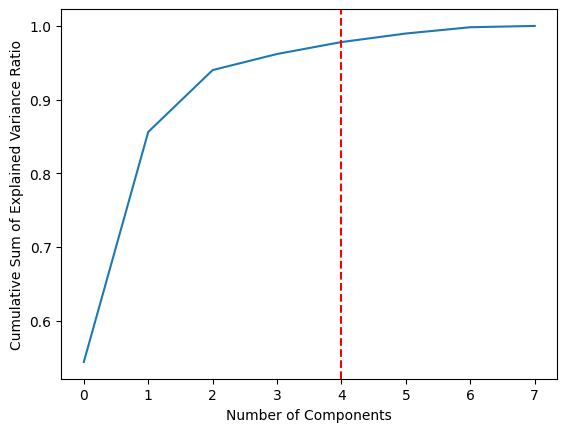

In [ ]:
import numpy as np
import pywt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = ts_accounts(2)[['updated_amount','MA_10','MA_30','Lag1','Lag2', 'Lag10','std_dev','week_of_year']]
scaler = MinMaxScaler(feature_range=(0, 10))
norm_data = scaler.fit_transform(data)

pca = PCA()
pca.fit(norm_data)

explained_var = pca.explained_variance_ratio_
cumsum_var = np.cumsum(explained_var)
n_components = np.argmax(cumsum_var >= 0.95) + 1

plt.plot(cumsum_var)
plt.axvline(n_components, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Sum of Explained Variance Ratio')
plt.show()


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have already defined and scaled your data
data = ts_accounts(2)[['MA_10', 'MA_30', 'Lag1', 'Lag2', 'Lag10', 'std_dev', 'week_of_year']]
scaler = MinMaxScaler(feature_range=(0, 1))
norm_data = scaler.fit_transform(data)
pca = PCA()
pca.fit(norm_data)

explained_var = pca.explained_variance_ratio_
cumsum_var = np.cumsum(explained_var)
n_components = np.argmax(cumsum_var >= 0.95) + 1

plt.plot(cumsum_var)
plt.axvline(n_components, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Sum of Explained Variance Ratio')
plt.show()

X=ts_accounts(2)['debit']

reconstructed_data = pca.inverse_transform(pca.transform(norm_data))[:, n_components]
reconstructed_data
    # Create a new dataframe with the original and reconstructed data
#for k in range(1, num_features+1):
    #  reconstructed_data = pca.inverse_transform(pca.transform(norm_data))[:, :k]

plt.plot(data.index, reconstructed_data, label='Reconstructed data')
plt.plot(data.index, X, label='original')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
def pca(data, list=['MA_10', 'MA_30', 'Lag1','Lag10','day_of_week'] ):
  from sklearn.decomposition import PCA
  data = data[list]
  scaler = MinMaxScaler(feature_range=(0, 1))
  norm_data = scaler.fit_transform(data)
  pca = PCA()
  pca.fit(norm_data)

  explained_var = pca.explained_variance_ratio_
  cumsum_var = np.cumsum(explained_var)
  n_components = np.argmax(cumsum_var >= 0.95) + 1
  reconstructed_data = pca.inverse_transform(pca.transform(norm_data))[:, n_components]
  return reconstructed_data, cumsum_var, n_components,list


In [ ]:
def mad_aic_bic(data, denoising='mad'):
  import numpy as np
  import matplotlib.pyplot as plt
  from scipy.interpolate import interp1d
  scaler = MinMaxScaler(feature_range=(0, 1))
  normalized_data = scaler.fit_transform(np.array(data).reshape(-1, 1)).flatten()
  original_data=data.copy
  data=data.values
  mad = np.mean(np.abs(data - np.mean(data)))


  if(denoising=='mad'):
    threshold = 3
    n = len(data)
    outliers = np.where(np.abs(data - np.median(data)) / mad > threshold)[0]
    non_outlier_indices = np.where(np.abs(data - np.median(data)) / mad <= threshold)[0]
  elif(denoising=='AIC'):
    mad = np.mean(np.abs(data - np.mean(data)))
    aic_threshold = 2 * np.log(n) * mad
    outliers = np.where(np.abs(data - np.median(data)) / mad > aic_threshold)[0]
    non_outlier_indices = np.where(np.abs(data - np.median(data)) / mad <= aic_threshold)[0]
  elif(denoising=='BIC'):
    mad = np.mean(np.abs(data - np.mean(data)))
    bic_threshold = np.log(n) * mad * np.sqrt(2 * np.log(n))
    outliers = np.where(np.abs(data - np.median(data)) / mad > bic_threshold)[0]
    non_outlier_indices = np.where(np.abs(data - np.median(data)) / mad <= bic_threshold)[0]

  interp_func = interp1d(non_outlier_indices, data[non_outlier_indices], kind='linear')
  interpolated_values = interp_func(outliers)
  original_data = np.copy(data)
  data[outliers] = interpolated_values

  return data, original_data, outliers




In [ ]:
data, original_data, outliers=mad_aic_bic(data=ts_accounts(2)['debit'])
plt.plot(range(len(original_data)), original_data, label='Original Data with Outliers')
plt.plot(outliers, original_data[outliers], 'ro', label='Outliers')

# Plot the updated data with interpolated values
plt.plot(range(len(data)), data, label='Updated Data (Outliers Interpolated)')


#plt.plot(outliers, data[outliers], 'ro', label='Outliers')
plt.legend()
plt.legend()
plt.show()

NameError: ignored

In [ ]:
data = smoothing(data=ts_accounts(2)['debit'], window=14)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(np.array(data).reshape(-1, 1))

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# make predictions
testX = test[:-1]  # Remove the last row of the original test data
testX_pred = testX.copy()

for i in range(len(testX)):
    testX_pred[i] = model.predict(np.array([testX_pred[i]]).reshape(1, look_back))

trainPredict = model.predict(trainX)
testPredict = model.predict(testX_pred)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([test[:-1]])  # Use the original test data without the last row

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+look_back:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


<ipython-input-10-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-10-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1


NameError: ignored

<ipython-input-158-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-158-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1
<ipython-input-159-692ef0856f49>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_weekly=ts_

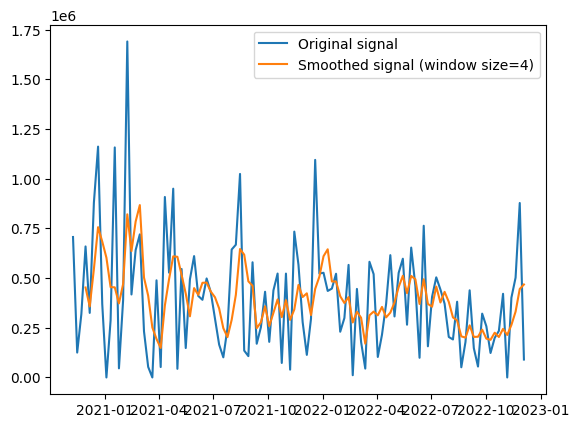

In [ ]:
data=ts_week(6)['debit']
window_size=4
X=smoothing(data=data,window=window_size)
plt.plot(data.index, data, label='Original signal')
plt.plot(data.index[window_size-1:], X, label=f'Smoothed signal (window size={window_size})')
plt.legend()
plt.show()

In [ ]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
def lof(data, neighbours=None):
  original_data = np.array(data).reshape(-1, 1)
  lof = LocalOutlierFactor(n_neighbors=neighbours)
  outlier_scores = lof.fit_predict(original_data)
  outliers_indices = outlier_scores == -1
  outliers = np.where(outliers_indices)[0]
  data_interp = original_data.copy()
  for idx in outliers:

    if 0 < idx < len(data_interp) - 1:

         interpolated_value = (data_interp[idx-1] + data_interp[idx+1]) / 2.0
         data_interp[idx] = interpolated_value

  return data_interp, original_data, outliers

<ipython-input-158-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-158-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1
<ipython-input-159-692ef0856f49>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_weekly=ts_

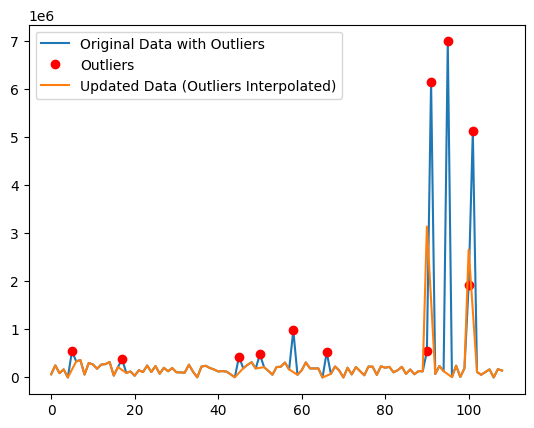

In [ ]:
data_interp, original_data, outliers_iof=lof(data=ts_week(2)['debit'], neighbours=10)
plt.plot(range(len(original_data)), original_data, label='Original Data with Outliers')
plt.plot(outliers_iof, original_data[outliers_iof], 'ro', label='Outliers')

# Plot the updated data with interpolated values
plt.plot(range(len(data_interp)), data_interp, label='Updated Data (Outliers Interpolated)')


#plt.plot(outliers, data[outliers], 'ro', label='Outliers')
plt.legend()
plt.legend()
plt.show()

<ipython-input-158-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-158-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1
<ipython-input-158-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

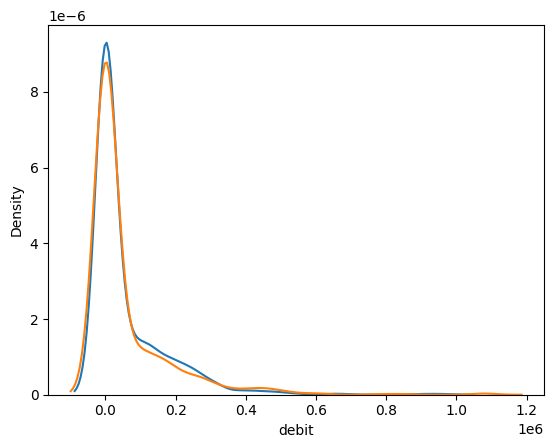

In [ ]:
import seaborn as sns

sns.kdeplot(ts_accounts(6)['debit'])
sns.kdeplot(ts_accounts(6)['credit'])
plt.show()


In [ ]:
pip install sktime


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyts


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from pyts.decomposition import SingularSpectrumAnalysis
from sklearn.metrics import adjusted_mutual_info_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def ssa(data):
  def create_delay_embedded_matrix(data, window_size, step_size):
    n = len(data)
    k = (n - window_size) // (step_size) + 1
    X = np.zeros((k, window_size))
    for i in range(k):
        start = i * step_size
        end = start + window_size
        X[i] = data[start:end]
    return X
  scaler = MinMaxScaler(feature_range=(0, 1))
  data=ts_week(2)['debit']
  normalized_data = scaler.fit_transform(np.array(data).reshape(-1, 1)).flatten()

  window_sizes = range(5, 10)
  step_sizes = range(1, 10)
  best_ami = -1
  best_window_size = None
  best_step_size = None
  embedded_matrix=[]
  for window_size in window_sizes:
      for step_size in range(1, window_size):
        # Create delay-embedded matrix
          X = create_delay_embedded_matrix(normalized_data, window_size, step_size)
          embedded_matrix.append(X)
          desired_length = len(X.flatten())
          if len(normalized_data) < desired_length:
            ts_padded = np.pad(normalized_data, (0, desired_length - len(normalized_data)), 'constant')
          else:
            ts_padded = normalized_data[:desired_length]

          ami = adjusted_mutual_info_score(ts_padded, X.flatten())
          # Update best AMI and parameters
          if ami> best_ami:
               best_ami = ami
               best_window_size = window_size
               best_step_size = step_size


# Normalize the trajectory matrix
  scaler = StandardScaler()
  trajectory_matrix_normalized = scaler.fit_transform(X)
  create_delay_embedded_matrix(data,window_size=best_window_size,step_size=best_step_size)

# Set the desired number of components
  n_components = 2

# Create an instance of Singular Spectrum Analysis
  ssa = SingularSpectrumAnalysis()

# Apply SSA to the normalized trajectory matrix
  X_ssa = ssa.fit_transform(trajectory_matrix_normalized)

# Use the principal components as input for the LSTM model
  principal_components = X_ssa[:, :n_components]
  return principal_components

# Now you can use the principal components as input for your LSTM model


In [ ]:
principal_components=ssa(data=ts_week(2)['debit'])
principal_components

<ipython-input-158-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-158-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1
<ipython-input-159-692ef0856f49>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ts_weekly=ts_

array([[[-4.29138341e-03,  1.97346597e-01, -2.62203284e-02,
         -1.12947153e-01, -2.88992017e-01,  4.01618063e-02,
          8.78081617e-01, -7.56960200e-02, -1.45448126e+00],
        [ 3.32626700e-02,  1.10174908e-03, -1.82670559e-01,
         -3.15525602e-02, -1.52242602e-01, -4.71159696e-02,
          6.38450690e-01, -1.35927576e-01,  1.80712115e-03]],

       [[-1.81865671e-01,  2.61181252e-01, -1.20932905e-01,
          3.10279169e-03,  2.69346437e-01, -4.67710163e-01,
          7.72185047e-01, -7.26385475e-01,  9.88285401e-01],
        [-5.23060470e-01,  4.56726647e-01,  7.65716256e-02,
         -1.09951199e-01, -1.57634003e-01, -4.23364053e-02,
          3.89086887e-01, -6.30364324e-02, -2.78941525e-01]],

       [[ 1.41187035e+00,  1.00376494e+00,  7.71879637e-03,
         -2.34538380e-01, -1.75317968e-01, -1.84740547e-01,
         -1.06840161e-01,  3.88102147e-02,  1.90246875e-02],
        [-5.45348400e-01,  8.92542142e-01, -4.66858088e-01,
          1.10806831e-01, -1.56

In [ ]:
data=ts_accounts(8)[['debit','MA_7','MA_30','week_of_year']]


<ipython-input-158-1f45065dc6bc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-158-1f45065dc6bc>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1


In [ ]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Create PCA object
pca=PCA()

# Fit PCA to the data
pca.fit(X)


# Get explained variance ratio of each component
explained_var = pca.explained_variance_ratio_

# Plot cumulative sum of explained variance ratio
cumsum_var = np.cumsum(explained_var)
n_components = np.argmax(cumsum_var >= 0.95) + 1

# Plot cumulative sum of explained variance ratio
plt.plot(cumsum_var)
plt.axvline(n_components, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Sum of Explained Variance Ratio')
plt.show()

# Use the selected number of components for PCA

print(n_components)


ValueError: ignored

In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Prepare your data
data = ts_accounts(8)['debit']
train_size = int(len(data) * 0.85)
train_data = data[:train_size]
test_data = data[train_size:]

# Normalize your data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data = scaler.transform(test_data.values.reshape(-1, 1))

# Create your LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_data.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train your LSTM model
model.fit(train_data, train_data, epochs=50, batch_size=32)

# Evaluate your model
predictions = model.predict(test_data)
predictions = scaler.inverse_transform(predictions)


<ipython-input-10-5146669607fe>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_db']=normalized_db1
<ipython-input-10-5146669607fe>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts['norm_cr']=normalized_cr1


Epoch 1/50
21/21 [==============================] - 4s 4ms/step - loss: 0.0108
Epoch 2/50
21/21 [==============================] - 0s 4ms/step - loss: 0.0093
Epoch 3/50
21/21 [==============================] - 0s 4ms/step - loss: 0.0078
Epoch 4/50
21/21 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 5/50
21/21 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 6/50
21/21 [==============================] - 0s 5ms/step - loss: 4.3225e-04
Epoch 7/50
21/21 [==============================] - 0s 7ms/step - loss: 3.7845e-05
Epoch 8/50
21/21 [==============================] - 0s 6ms/step - loss: 2.5302e-05
Epoch 9/50
21/21 [==============================] - 0s 6ms/step - loss: 1.8401e-05
Epoch 10/50
21/21 [==============================] - 0s 6ms/step - loss: 1.7055e-05
Epoch 11/50
21/21 [==============================] - 0s 6ms/step - loss: 1.4701e-05
Epoch 12/50
21/21 [==============================] - 0s 6ms/step - loss: 1.3547e-05
Epoch 13/50
21/21 [==

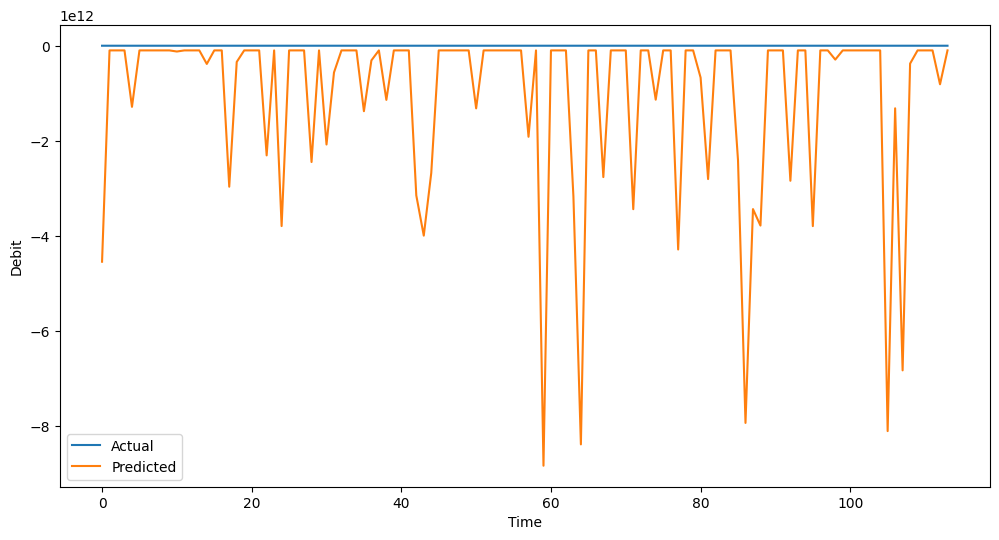

In [ ]:
import matplotlib.pyplot as plt

# Rescale the test data and predictions
test_data_rescaled = scaler.inverse_transform(test_data)
predictions_rescaled = scaler.inverse_transform(predictions)

# Plot the test data and predictions
plt.figure(figsize=(12,6))
plt.plot(test_data_rescaled, label='Actual')
plt.plot(predictions_rescaled, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Debit')
plt.legend()
plt.show()
